In [5]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from commpy.filters import rcosfilter

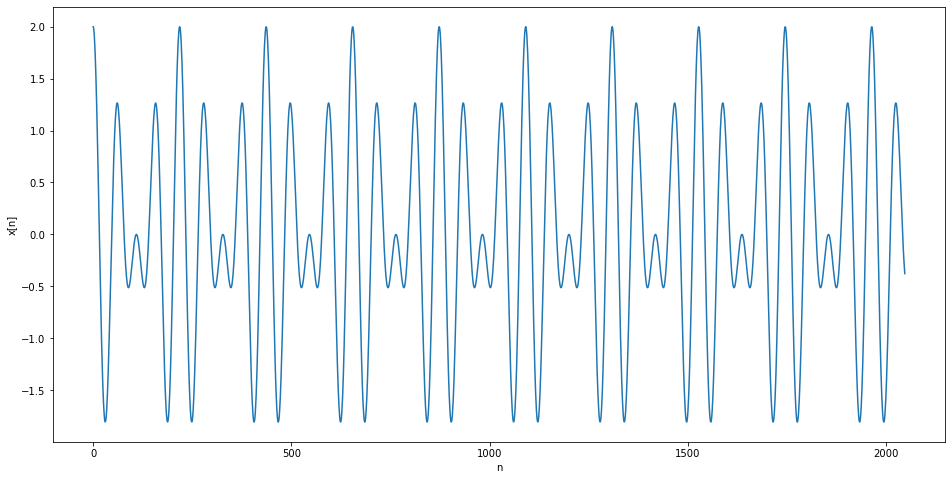

In [4]:
fs = 48000
N = 2048

f0 = 660
f1 = 880

A0 = 1
A1 = 1

n = np.arange(N)

x = A0*np.cos((2*(np.pi)*f0/fs)*n) + A1*np.cos((2*(np.pi)*f1/fs)*n)

plt.figure(figsize=(16, 8))
plt.plot(n, x)
plt.ylabel('x[n]')
plt.xlabel('n')
plt.show()

### First Order IIR

\begin{equation}
    y[n] = bx[n] + ay[n - 1], \quad where\;a = d\;and\;b = 1 - d,
\end{equation}

\begin{equation}
    d = exp(-1/\tau)
\end{equation}

\begin{equation}
    \tau(f_c) = \tau_{min} + \frac{100Hz}{f_c}\left(\tau_{100} - \tau_{min}\right), \quad where\;\tau_{min} = 4ms\;and\;\tau_{100} = 50ms
\end{equation}

In [17]:
class IIRForwardMask:
    def __init__(self, tau_min: float = 4.0, tau_100: float = 50.0):
        self.tau_min = tau_min
        self.tau_100 = tau_100
        self.reset()
        
    def reset(self):
        self.y = 0
    
    def _get_time_constant(self, fc: float):
        return self.tau_min + (100/fc)*(self.tau_100 - self.tau_min)

    def _get_decay(self, fc: float):
        return exp(-1/self._get_time_constant(fc))
    
    def filter(self, fc, x):
        self.b = 1 - self._get_decay(fc)
        self.y += self.b * (x - self.y)
        return self.y

In [18]:
iir = IIRForwardMask()

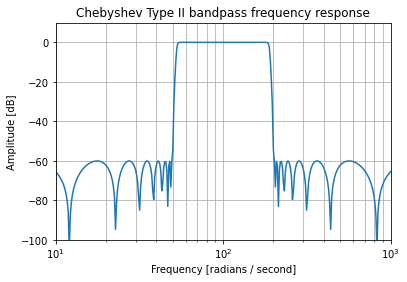

In [15]:
b, a = signal.iirfilter(
    17,
    [50, 200],
    rs=60,
    btype='band',
    analog=True,
    ftype='cheby2'
)
w, h = signal.freqs(b, a, 1000)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.semilogx(w, 20 * np.log10(abs(h)))
ax.set_title('Chebyshev Type II bandpass frequency response')
ax.set_xlabel('Frequency [radians / second]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()